<a href="https://colab.research.google.com/github/PratikshaShelke24/AI/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello ,I wants to leran AI ")

Hello ,I wants to leran AI 


In [ ]:
# Step 1: Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve

In [ ]:
# Step 2: Create a sample dataset

In [3]:
data = {'Age': [22, 25, 47, 52, 46, 56, 48, 55, 60, 62],
        'EstimatedSalary': [15000, 29000, 52000, 72000, 70000, 81000, 61000, 95000, 79000, 67000],
        'Purchased': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]}
df = pd.DataFrame(data)


In [ ]:
# Step 3: Split data into features (X) and target (y)

In [4]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [ ]:
# Step 4: Split dataset into training and test sets (80% training, 20% testing)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Step 5: Feature scaling (Standardization)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 6: Train logistic regression model

In [7]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Step 7: Make predictions

In [8]:
y_pred = model.predict(X_test)

In [ ]:
# Step 8: Evaluate the model

In [9]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[2]]
Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# Step 9: Visualize decision boundary (Training set)

<ipython-input-13-190604fab953>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


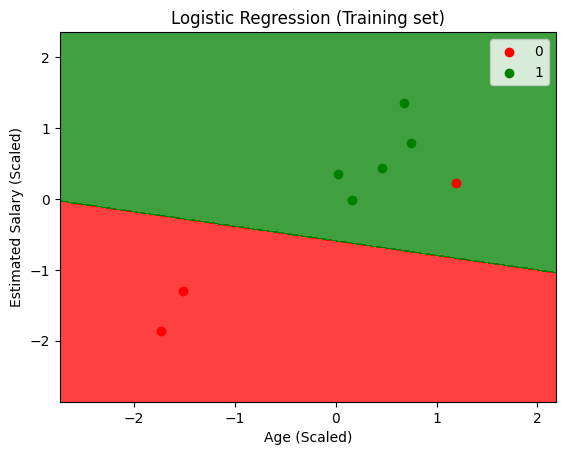

In [13]:


# Assuming X_train, y_train, and model are already defined
X_set, y_set = X_train, y_train

# Create a grid of points covering the feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict the decision boundary for the grid points
predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot the decision boundary using contourf
plt.contourf(
    X1, X2, predictions,
    alpha=0.75, cmap=ListedColormap(['red', 'green'])  # Ensure square brackets
)

# Set axis limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(['red', 'green'])(i), label=j
    )

# Add titles and labels
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend()
plt.show()

In [ ]:
# Calculate confusion matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


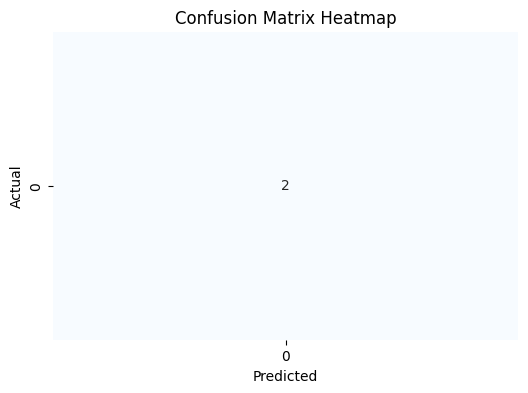

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

# Compute ROC curve and AUC (Area Under Curve)

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


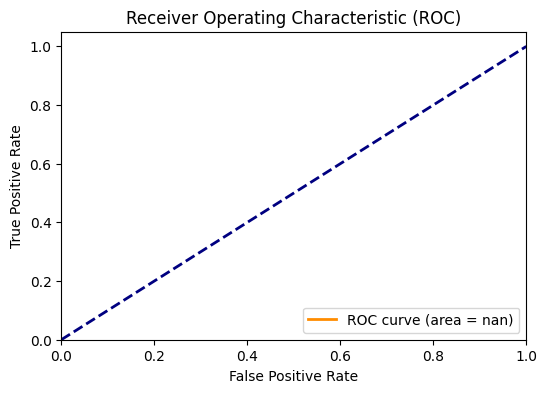

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import precision_recall_curve

In [ ]:

# Calculate precision-recall curve

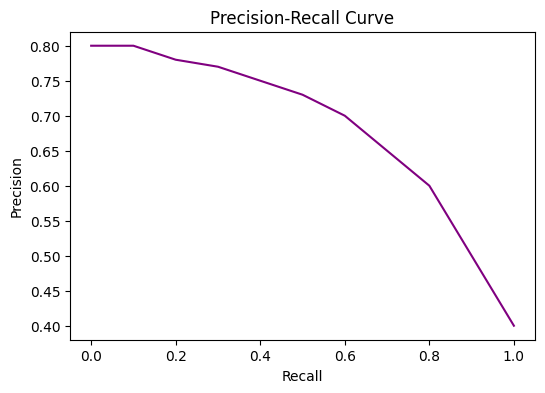

In [19]:
recall = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
precision = [0.8, 0.8, 0.78, 0.77, 0.75, 0.73, 0.7, 0.65, 0.6, 0.5, 0.4]
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
# Plot learning curve

In [20]:
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:2050: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
# Calculate means and standard deviations

In [21]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
# Plot learning curve

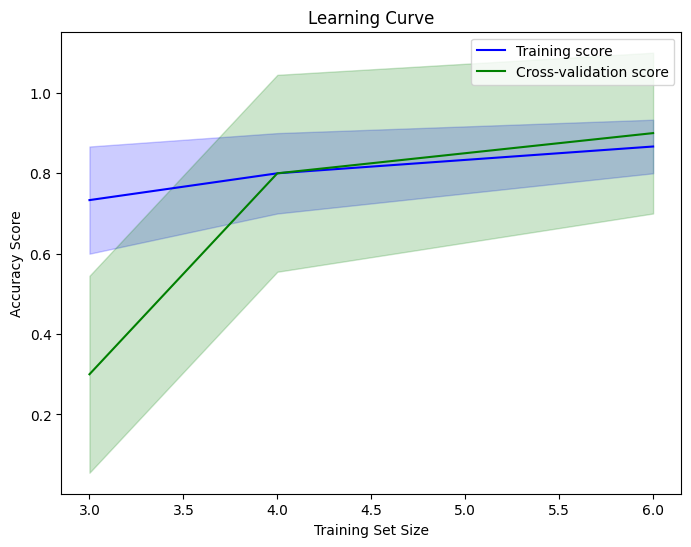

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [ ]:
# Coefficients of logistic regression model

In [ ]:
coefficients = model.coef_[0]

In [ ]:
# Create a bar plot for feature importance

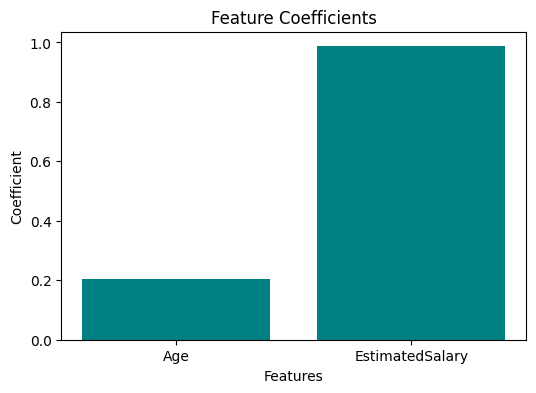

In [25]:
coefficients = model.coef_[0]
features = df.columns[:-1]  # excluding the target column
plt.figure(figsize=(6, 4))
plt.bar(features, coefficients, color='teal')
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

In [ ]:
# Predict probabilities for test set

In [26]:
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# Plot probability distribution

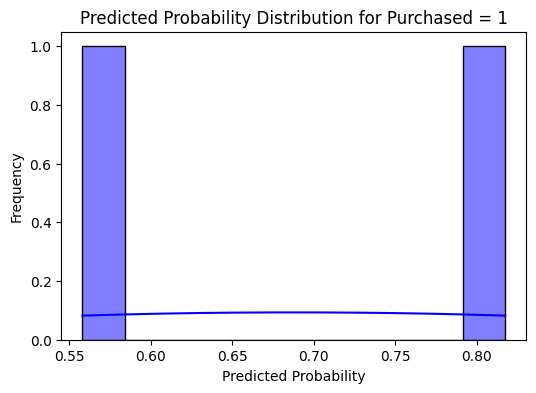

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=10, kde=True, color='blue')
plt.title('Predicted Probability Distribution for Purchased = 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Plot decision boundary for test data

ValueError: 'red' is not a valid color value.

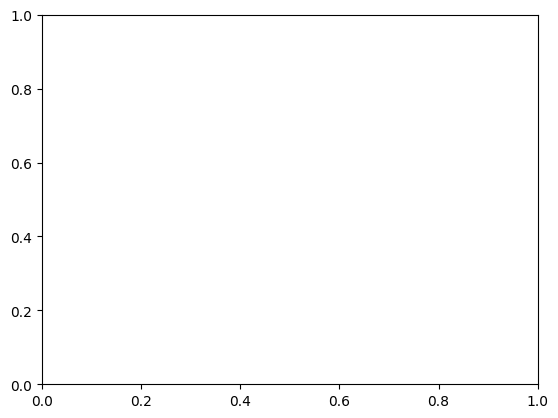

In [29]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend()
plt.show()